# 📊 Data Analysis for Social Media Project
Exploration of topics, opinions, and conclusions datasets before preprocessing.

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Load raw files
data_dir = Path("../data")  # adjust path if needed
opinions = pd.read_csv(data_dir / "opinions.csv")
topics = pd.read_csv(data_dir / "topics.csv")
conclusions = pd.read_csv(data_dir / "conclusions.csv")

print("Opinions:", opinions.shape)
print("Topics:", topics.shape)
print("Conclusions:", conclusions.shape)

display(opinions.head())
display(topics.head())
display(conclusions.head())


Opinions: (9747, 5)
Topics: (4024, 5)
Conclusions: (3351, 5)


,id,topic_id,text,type,effectiveness
0,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate
1,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate
2,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate
3,36a565e45db7,007ACE74B050,"though some say that life on Mars does exist, ...",Rebuttal,Ineffective
4,fb65fe816ba3,007ACE74B050,"It says in paragraph 7, on April 5, 1998, Mars...",Evidence,Adequate


,id,topic_id,text,type,effectiveness
0,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate
1,de347c859ab6,00944C693682,With so many things in this world that few peo...,Position,Effective
2,c20937683442,00BD97EA4041,"No because, why should a computer know how you...",Position,Adequate
3,9d03e2bef0ff,00C6E82FE5BA,I think that it wouldn't be valueable to have ...,Position,Adequate
4,c2203a58aa5c,013B9AA6B9DB,"Well, some people believe that it was somethin...",Position,Adequate


,id,topic_id,text,type,effectiveness
0,28a94d3ee425,007ACE74B050,Though people were not satified about how the ...,Concluding Statement,Adequate
1,9fd314f638e5,00944C693682,Individual car use isn't bad. Millions of indi...,Concluding Statement,Effective
2,af494e4e0b4f,00BD97EA4041,To conclusion computers in school shouldn't de...,Concluding Statement,Adequate
3,9c3b9503c9a4,00C6E82FE5BA,The reasons why i said that this would be unva...,Concluding Statement,Adequate
4,b199e5df1815,013B9AA6B9DB,"So, in conclusion, the famous face on Mars was...",Concluding Statement,Adequate


## 1. Distribution of Opinion Types

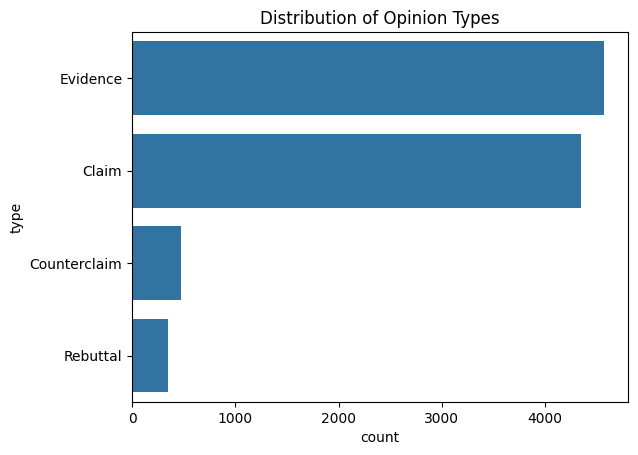

In [4]:

sns.countplot(y=opinions['type'], order=opinions['type'].value_counts().index)
plt.title("Distribution of Opinion Types")
plt.show()


## 2. Opinions per Topic

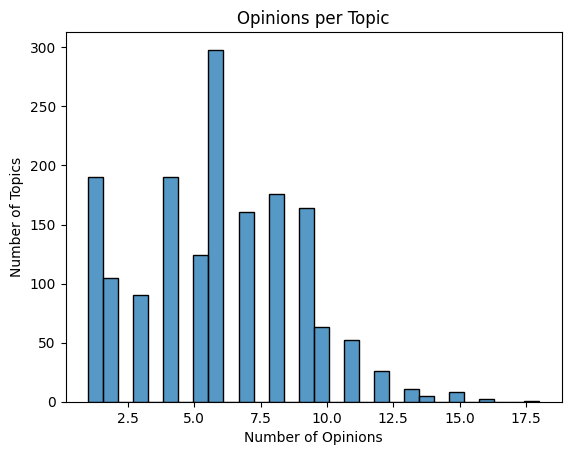

In [5]:

opinions_per_topic = opinions['topic_id'].value_counts()
sns.histplot(opinions_per_topic, bins=30)
plt.title("Opinions per Topic")
plt.xlabel("Number of Opinions")
plt.ylabel("Number of Topics")
plt.show()


## 3. Token Length Distribution (Opinions)

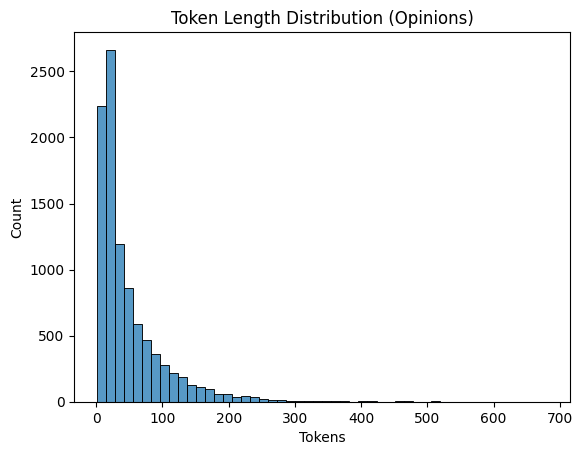

In [6]:

opinions['tok_len'] = opinions['text'].astype(str).apply(lambda x: len(x.split()))
sns.histplot(opinions['tok_len'], bins=50)
plt.title("Token Length Distribution (Opinions)")
plt.xlabel("Tokens")
plt.show()


## 4. Token Length Distribution (Topics & Conclusions)

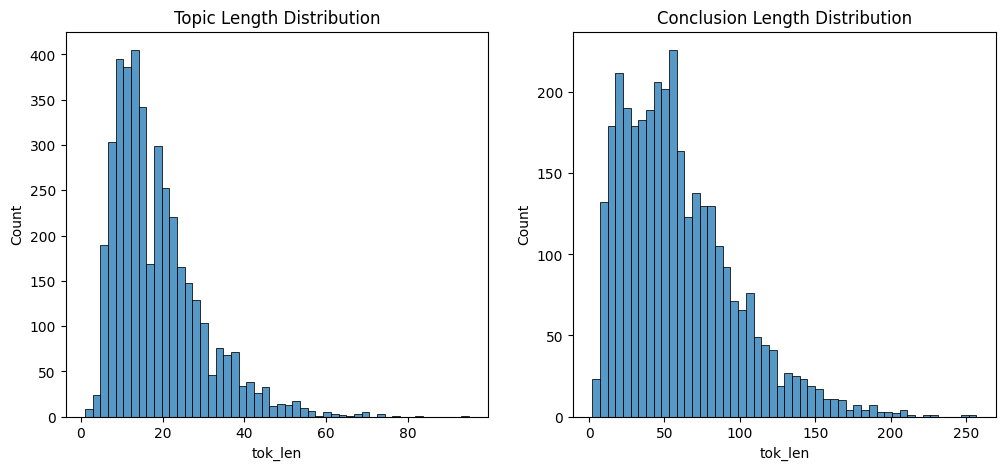

In [7]:

topics['tok_len'] = topics['text'].astype(str).apply(lambda x: len(x.split()))
conclusions['tok_len'] = conclusions['text'].astype(str).apply(lambda x: len(x.split()))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(topics['tok_len'], bins=50, ax=axes[0])
axes[0].set_title("Topic Length Distribution")

sns.histplot(conclusions['tok_len'], bins=50, ax=axes[1])
axes[1].set_title("Conclusion Length Distribution")
plt.show()


## 5. Opinion Types per Topic (Sample Heatmap)

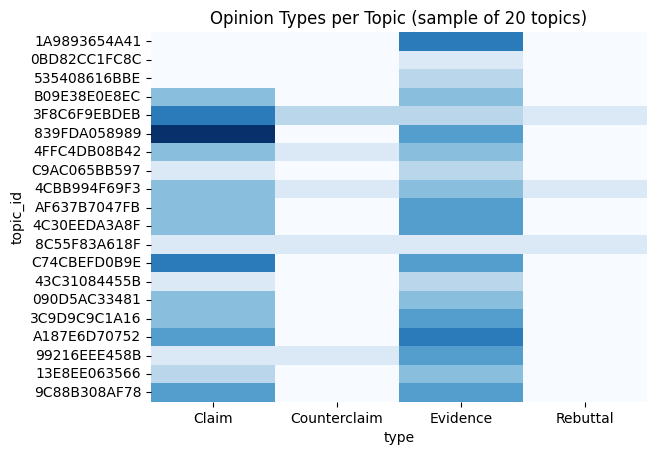

In [8]:

opinions_type_topic = opinions.groupby(['topic_id','type']).size().unstack(fill_value=0)
sns.heatmap(opinions_type_topic.sample(20), cmap="Blues", cbar=False)
plt.title("Opinion Types per Topic (sample of 20 topics)")
plt.show()


## 6. Duplicate Check

In [9]:

dup_ratio = opinions['text'].duplicated().mean()
print(f"Duplicate opinions ratio: {dup_ratio:.2%}")


Duplicate opinions ratio: 0.05%


In [10]:
# Basic dataset summaries
def dataset_summary(df, name):
    print(f"--- {name} ---")
    print("Shape:", df.shape)
    print(df.dtypes)
    print(df.describe(include='all').T[['count','unique','top','freq']])
    print("\n")

dataset_summary(opinions, "Opinions")
dataset_summary(topics, "Topics")
dataset_summary(conclusions, "Conclusions")


--- Opinions ---
Shape: (9747, 6)
id               object
topic_id         object
text             object
type             object
effectiveness    object
tok_len           int64
dtype: object
                count unique  \
id               9747   9747   
topic_id         9746   1666   
text             9746   9741   
type             9746      4   
effectiveness    9746      3   
tok_len        9747.0    NaN   

                                                             top  freq  
id                                                         677b0     1  
topic_id                                            32E2949B0C66    18  
text           Opponents say that cell phones are good becaus...     2  
type                                                    Evidence  4574  
effectiveness                                           Adequate  5373  
tok_len                                                      NaN   NaN  


--- Topics ---
Shape: (4024, 6)
id               object
topic_id      

In [11]:
# Ensure every topic has at least one opinion & one conclusion
opinions_topics = set(opinions['topic_id'].unique())
topics_all = set(topics['topic_id'].unique())
conclusions_topics = set(conclusions['topic_id'].unique())

print("Topics total:", len(topics_all))
print("With opinions:", len(opinions_topics))
print("With conclusions:", len(conclusions_topics))

missing_opinion_topics = topics_all - opinions_topics
missing_conclusion_topics = topics_all - conclusions_topics

print("Topics missing opinions:", len(missing_opinion_topics))
print("Topics missing conclusions:", len(missing_conclusion_topics))


Topics total: 4005
With opinions: 1667
With conclusions: 3332
Topics missing opinions: 2475
Topics missing conclusions: 720


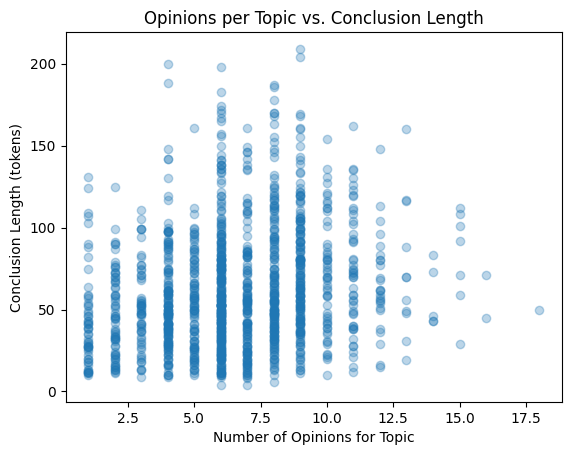

In [12]:
# Merge counts with conclusions
opinions_per_topic = opinions.groupby("topic_id").size().reset_index(name="opinion_count")
conclusions_len = conclusions.copy()
conclusions_len["conclusion_len"] = conclusions_len["text"].astype(str).apply(lambda x: len(x.split()))

merged = pd.merge(opinions_per_topic, conclusions_len, on="topic_id", how="inner")

plt.scatter(merged["opinion_count"], merged["conclusion_len"], alpha=0.3)
plt.xlabel("Number of Opinions for Topic")
plt.ylabel("Conclusion Length (tokens)")
plt.title("Opinions per Topic vs. Conclusion Length")
plt.show()


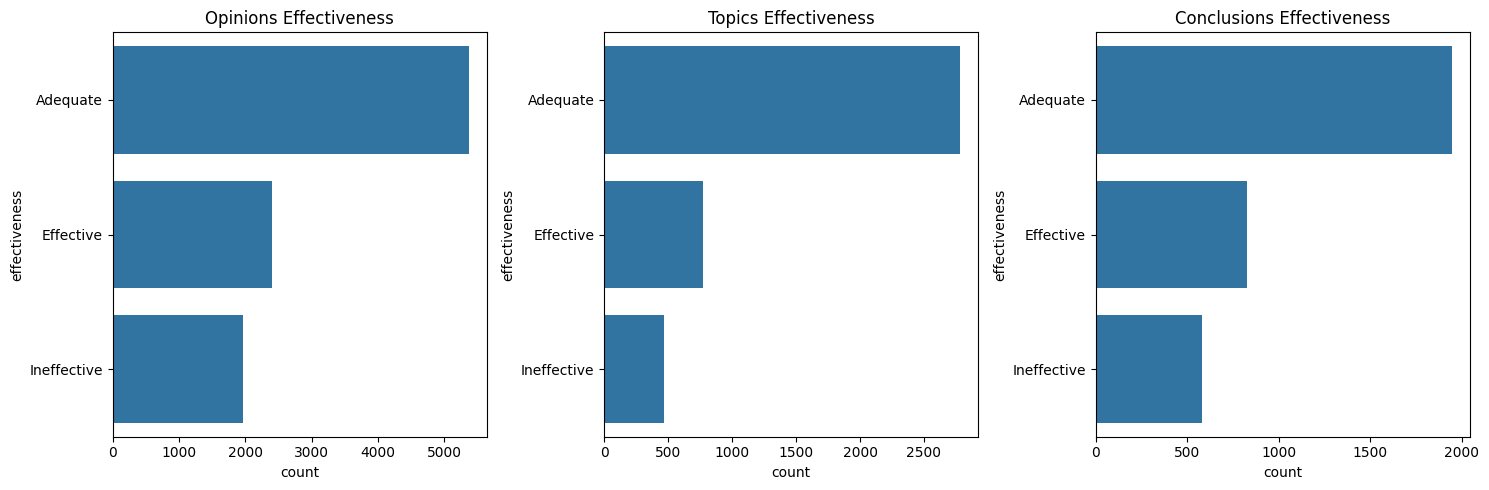

In [13]:
# Effectiveness distribution across datasets
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(y=opinions['effectiveness'], order=opinions['effectiveness'].value_counts().index, ax=axes[0])
axes[0].set_title("Opinions Effectiveness")

sns.countplot(y=topics['effectiveness'], order=topics['effectiveness'].value_counts().index, ax=axes[1])
axes[1].set_title("Topics Effectiveness")

sns.countplot(y=conclusions['effectiveness'], order=conclusions['effectiveness'].value_counts().index, ax=axes[2])
axes[2].set_title("Conclusions Effectiveness")

plt.tight_layout()
plt.show()


effectiveness  Adequate  Effective  Ineffective
type                                           
Claim              59.9       26.6         13.5
Counterclaim       61.3       28.8          9.9
Evidence           49.9       21.9         28.2
Rebuttal           56.2       32.0         11.8


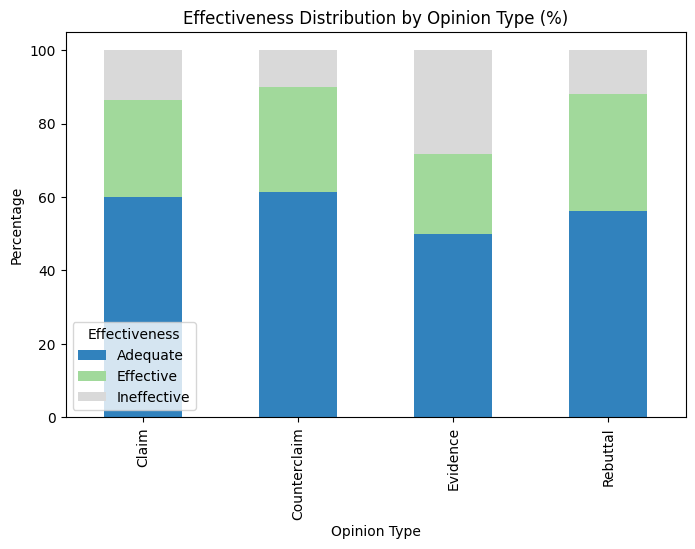

In [14]:
# Crosstab: Opinion type vs Effectiveness
crosstab = pd.crosstab(opinions['type'], opinions['effectiveness'], normalize='index') * 100
print(crosstab.round(1))

crosstab.plot(kind='bar', stacked=True, figsize=(8,5), colormap="tab20c")
plt.title("Effectiveness Distribution by Opinion Type (%)")
plt.ylabel("Percentage")
plt.xlabel("Opinion Type")
plt.legend(title="Effectiveness")
plt.show()


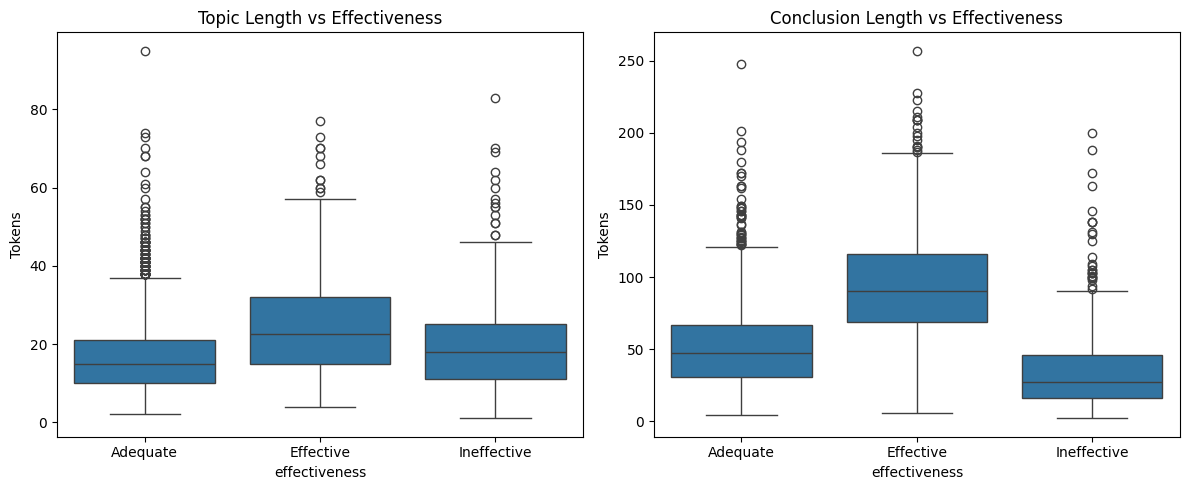

In [15]:
# Effectiveness vs Length (Topics & Conclusions)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x="effectiveness", y="tok_len", data=topics, ax=axes[0])
axes[0].set_title("Topic Length vs Effectiveness")
axes[0].set_ylabel("Tokens")

sns.boxplot(x="effectiveness", y="tok_len", data=conclusions, ax=axes[1])
axes[1].set_title("Conclusion Length vs Effectiveness")
axes[1].set_ylabel("Tokens")

plt.tight_layout()
plt.show()


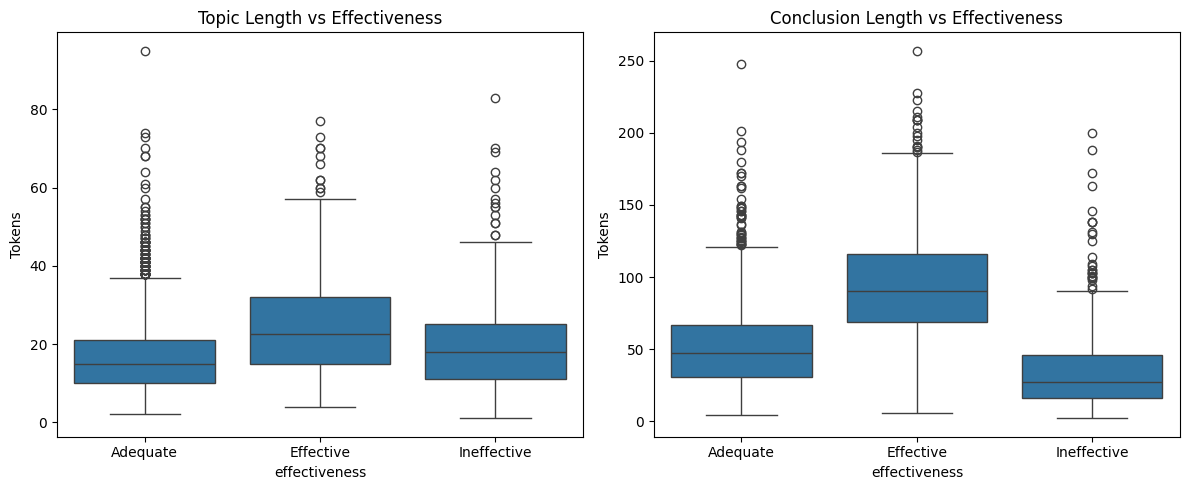

In [16]:
# Effectiveness vs Length (Topics & Conclusions)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x="effectiveness", y="tok_len", data=topics, ax=axes[0])
axes[0].set_title("Topic Length vs Effectiveness")
axes[0].set_ylabel("Tokens")

sns.boxplot(x="effectiveness", y="tok_len", data=conclusions, ax=axes[1])
axes[1].set_title("Conclusion Length vs Effectiveness")
axes[1].set_ylabel("Tokens")

plt.tight_layout()
plt.show()


Spearman correlations:
                 opinion_count  conclusion_len
opinion_count        1.000000        0.231564
conclusion_len       0.231564        1.000000


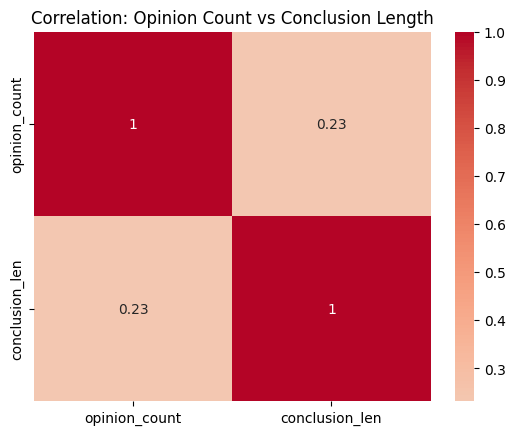

In [17]:
# Merge opinion counts with conclusion lengths
opinions_per_topic = opinions.groupby("topic_id").size().reset_index(name="opinion_count")
conclusions_len = conclusions.copy()
conclusions_len["conclusion_len"] = conclusions_len["text"].astype(str).apply(lambda x: len(x.split()))

merged = pd.merge(opinions_per_topic, conclusions_len, on="topic_id", how="inner")

# Spearman correlations (good for non-linear, ranked data)
corr = merged[["opinion_count", "conclusion_len"]].corr(method="spearman")
print("Spearman correlations:\n", corr)

sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation: Opinion Count vs Conclusion Length")
plt.show()


In [18]:
import re
from collections import Counter

def tokenize(texts):
    words = []
    for t in texts:
        t = str(t).lower()
        t = re.sub(r"[^a-zA-Z0-9çğıöşüİÇĞÖŞÜ]", " ", t)  # keep letters & numbers
        words.extend(t.split())
    return set(words)

topic_vocab = tokenize(topics['text'])
opinion_vocab = tokenize(opinions['text'])
conclusion_vocab = tokenize(conclusions['text'])

print("Topic vocab size:", len(topic_vocab))
print("Opinion vocab size:", len(opinion_vocab))
print("Conclusion vocab size:", len(conclusion_vocab))

print("Overlap topic ↔ opinion:", len(topic_vocab & opinion_vocab))
print("Overlap topic ↔ conclusion:", len(topic_vocab & conclusion_vocab))
print("Overlap opinion ↔ conclusion:", len(opinion_vocab & conclusion_vocab))


Topic vocab size: 4162
Opinion vocab size: 15298
Conclusion vocab size: 8391
Overlap topic ↔ opinion: 3163
Overlap topic ↔ conclusion: 2990
Overlap opinion ↔ conclusion: 5593


In [19]:
import pandas as pd
from pathlib import Path

data_dir = Path("../data")

# Interim (cleaned but unsplit)
topics_clean = pd.read_csv(data_dir / "interim/topics_clean.csv")
opinions_clean = pd.read_csv(data_dir / "interim/opinions_clean.csv")
conclusions_clean = pd.read_csv(data_dir / "interim/conclusions_clean.csv")

# Processed (ready for modeling)
topics_proc = pd.read_csv(data_dir / "processed/topics_processed.csv")
conclusions_proc = pd.read_csv(data_dir / "processed/conclusions_processed.csv")
opinions_train = pd.read_csv(data_dir / "processed/opinions_train.csv")
opinions_val   = pd.read_csv(data_dir / "processed/opinions_val.csv")
opinions_test  = pd.read_csv(data_dir / "processed/opinions_test.csv")

print("Interim:", len(topics_clean), len(opinions_clean), len(conclusions_clean))
print("Processed:", len(topics_proc), len(conclusions_proc))
print("Splits:", len(opinions_train), len(opinions_val), len(opinions_test))


Interim: 3920 9493 3343
Processed: 3920 3343
Splits: 7580 979 934


In [ ]:
import json

with open("../data/qa_report.json", "r", encoding="utf-8") as f:
    qa_report = json.load(f)

with open("../data/data_stats.json", "r", encoding="utf-8") as f:
    data_stats = json.load(f)

print("QA Report:", qa_report)
print("\nData Stats:")
data_stats


FileNotFoundError: [Errno 2] No such file or directory: '../artifacts/qa_report.json'